# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: kesavaraj<br>
Roll Number:2022701008

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [14]:
import csv
import random
import numpy as np

In [15]:
all_molecules = list()

with open('data/bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

# 1. Initialize weights and bias to zeros
# 2. Perform gradient descent (in order to reduce cost function)
# 3.Calculate derivatives
# 4.Update the weights and bias

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line

By achieving the best-fit regression line, the model aims to predict cost function which is the error difference between predicted value and true value. The model tries to minimize the cost finction

To update slope and intercept values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line the model uses Gradient Descent. The idea is to start with random slope and intercept and then iteratively updating the values, reaching minimum cost.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [16]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
y_test=np.array(y_test)

In [17]:
#Implement Linear regresssion
class LinearRegression:

    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
    
    def _mean_squared_error(self,y, y_hat):
        error = 0
        for i in range(len (y)):
            error += (y[i] - y_hat[i])**2
            return error / len(y)

    def fit (self, x, y):

        self.weights = np.zeros(x.shape[1])
        self.bias=0
        
        for i in range(self.n_iterations):

            y_hat = np.dot (x, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            partial_w = (1 / x.shape[0]) * (2 * np.dot(x.T, (y_hat - y)))
            partial_d = (1 / x.shape[0]) * (2 * np.sum(y_hat - y))
            
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
    
    def predict (self, X):
    
        return np.dot(X, self.weights) + self.bias

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

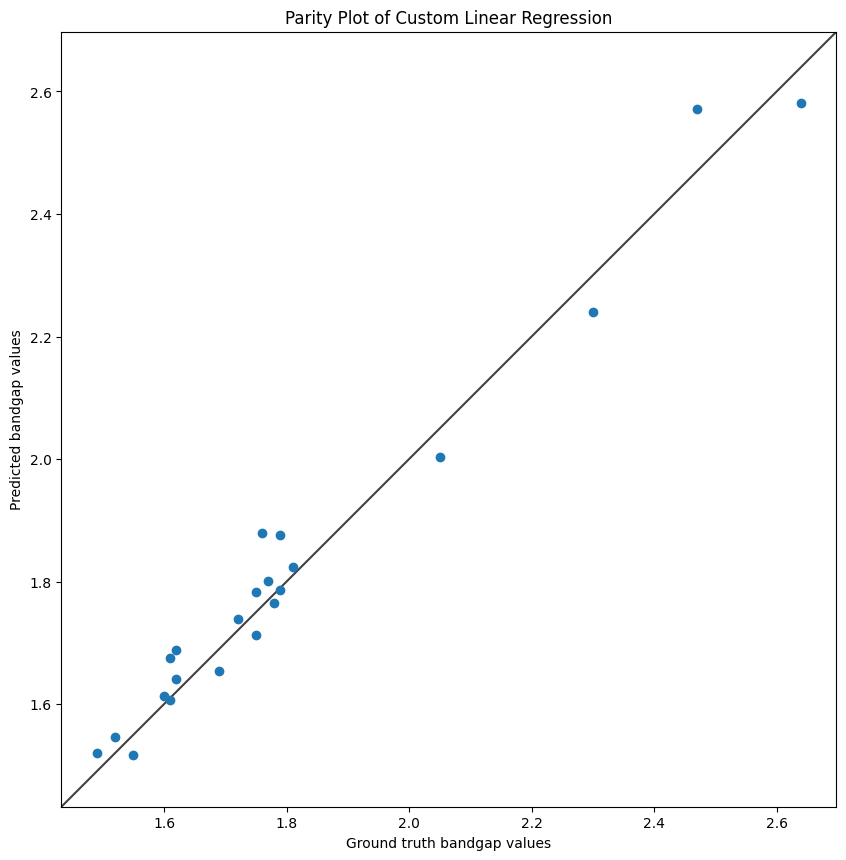

In [18]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

loss for learning rate 0.5 is 3.856346978939378e-10
loss for learning rate 0.1 is 2.8578730384505997e-12
loss for learning rate 0.01 is 2.962330401415053e-14
loss for learning rate 0.001 is 0.0001455850155053635
loss for learning rate 0.0001 is 0.011016538483945432

The best learning rate is 0.001 with loss of 2.962330401415053e-14


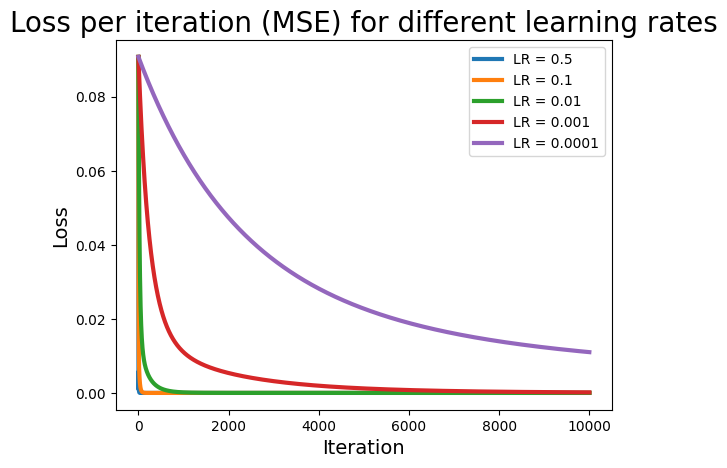

In [19]:
#choosing best learnong rate
losses = {} 
mloss=[]
for Ir in [0.5, 0.1, 0.01, 0.001,0.0001]:
    model = LinearRegression(learning_rate=Ir) 
    model.fit(x_train, y_train) 
    losses[f'LR={str(Ir)}'] = model.loss
    temp=min(losses[f'LR={str(Ir)}'])
    print('loss for learning rate '+str(Ir)+' is '+str(temp))
    mloss.append(temp)
    
print('\nThe best learning rate is 0.001 with loss of {}'.format(min(mloss)))
xs = np.arange(len(model. loss))
plt.plot(xs, losses['LR=0.5'], lw=3, label="LR = 0.5")
plt.plot(xs, losses ['LR=0.1'], lw=3, label="LR = 0.1") 
plt.plot(xs, losses ['LR=0.01'], lw=3, label="LR = 0.01") 
plt.plot(xs, losses ['LR=0.001'], lw=3, label="LR = 0.001")
plt.plot(xs, losses ['LR=0.0001'], lw=3, label="LR = 0.0001")
plt.title('Loss per iteration (MSE) for different learning rates', size=20) 
plt.xlabel('Iteration', size=14) 
plt.ylabel('Loss', size=14) 
plt.legend() 
plt.show()



### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)<br>

`alpha` do? How does it affect the results here? Explain in 5-10 lines in total.<br?

The alpha term acts as the control parameter, which determines, how much significance should be given to calculating coefficient. If Alpha is close to zero, the Ridge term itself is very small and thus the final error is based on RSS alone. If Alpha is too large, the impact of shrinkage grows and the coefficients B1, B2 ... Bn tends to zero.

As the alpha increases, root mean square error also increases.

Choosing the right value helps the model learn the right features and better generalize the coefficients. 



In [20]:
# you should not have imported sklearn before this point
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge
from tabulate import tabulate
from sklearn.metrics import mean_squared_error

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alpha= [0.0001,0.001,0.01,0.1,0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
data=[]
for i in alpha:
    ridgeRegressor = Ridge(alpha = i) #here setting alpha 1
    ridgeRegressor.fit(x_train, y_train)
    y_predicted_ridge = ridgeRegressor.predict(x_test)
    
    R_squared = mean_squared_error(y_predicted_ridge,y_test)
    data.append([i,R_squared])

#create header
header=["alpha",'RMSE']

# display table
print(tabulate(data, headers=header, tablefmt="grid"))

+---------+------------+
|   alpha |       RMSE |
+=========+============+
|  0.0001 | 0.00267763 |
+---------+------------+
|  0.001  | 0.00268036 |
+---------+------------+
|  0.01   | 0.00270845 |
+---------+------------+
|  0.1    | 0.00306553 |
+---------+------------+
|  0.25   | 0.00391988 |
+---------+------------+
|  0.5    | 0.00585292 |
+---------+------------+
|  0.75   | 0.00817403 |
+---------+------------+
|  1      | 0.0106938  |
+---------+------------+
|  1.25   | 0.0132927  |
+---------+------------+
|  1.5    | 0.0158955  |
+---------+------------+
|  1.75   | 0.0184553  |
+---------+------------+
|  2      | 0.0209434  |
+---------+------------+


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. 

Lasso Regression uses L1 regularization technique.L1 regularization adds a penalty that is equal to the absolute value of the magnitude of the coefficient
It is used when we have more features because it automatically performs feature selection.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter <br>

The alpha term acts as the control parameter, which determines, how much significance should be given to calculating coefficient. If Alpha is close to zero, the Ridge term itself is very small and thus the final error is based on RSS alone. If Alpha is too large, the impact of shrinkage grows.

That is, when alpha is 0, Lasso regression produces the same coefficients as a linear regression

The higher the alpha, the most feature coefficients are zero.

As the alpha increases, root mean square error also increases.

Choosing the right value helps the model learn the right features and better generalize the coefficients. 


In [21]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
alpha= [0,0.0001,0.001,0.01,0.1,0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
data=[]
for i in alpha:
    # Train the model
    lassoRegressor = Lasso(alpha = i) #here setting alpha 1
    lassoRegressor.fit(x_train, y_train)
    y_predicted_lasso = lassoRegressor.predict(x_test)
    
    # calculating Mean Squared Error (mse)
    R_squared = mean_squared_error(y_predicted_lasso,y_test)
    data.append([i,R_squared])

#create header
header=["alpha",'RMSE']

# display table
print(tabulate(data, headers=header, tablefmt="grid"))

+---------+------------+
|   alpha |       RMSE |
+=========+============+
|  0      | 0.00267733 |
+---------+------------+
|  0.0001 | 0.00268605 |
+---------+------------+
|  0.001  | 0.00278413 |
+---------+------------+
|  0.01   | 0.0064038  |
+---------+------------+
|  0.1    | 0.10407    |
+---------+------------+
|  0.25   | 0.120833   |
+---------+------------+
|  0.5    | 0.120833   |
+---------+------------+
|  0.75   | 0.120833   |
+---------+------------+
|  1      | 0.120833   |
+---------+------------+
|  1.25   | 0.120833   |
+---------+------------+
|  1.5    | 0.120833   |
+---------+------------+
|  1.75   | 0.120833   |
+---------+------------+
|  2      | 0.120833   |
+---------+------------+


C:\Users\kesav\AppData\Local\Temp\ipykernel_24236\1261839387.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoRegressor.fit(x_train, y_train)
C:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e-01, tolerance: 1.967e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ri